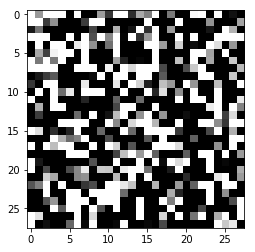

In [9]:
# loading data
import h5py
import numpy as np

with h5py.File('Data/hard.h5','r') as h5f:
    trainingNoise_data = h5f['training'][:]
    testNoise_data = h5f['test'][:]

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(trainingNoise_data[0].reshape(28,28), cmap='gray')

trainingNoise_data = trainingNoise_data.reshape(60000,784)
testNoise_data = testNoise_data.reshape(10000,784)

In [10]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [11]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import SGD

from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np

# this is the size of our encoded representations
encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim*4, activation='relu')(input_img)
encoded = Dense(encoding_dim*3, activation='relu')(encoded)
encoded = Dense(encoding_dim*2, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

encoded = Dense(encoding_dim*2, activation='relu')(encoded)
encoded = Dense(encoding_dim*3, activation='relu')(encoded)
encoded = Dense(encoding_dim*4, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [12]:
# training

autoencoder.fit(trainingNoise_data, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(testNoise_data, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 10s - loss: 0.3096 - val_loss: 0.2653
Epoch 2/200
60000/60000 [==============================] - 10s - loss: 0.2637 - val_loss: 0.2634
Epoch 3/200
60000/60000 [==============================] - 9s - loss: 0.2620 - val_loss: 0.2615
Epoch 4/200
60000/60000 [==============================] - 10s - loss: 0.2603 - val_loss: 0.2599
Epoch 5/200
60000/60000 [==============================] - 10s - loss: 0.2592 - val_loss: 0.2598
Epoch 6/200
60000/60000 [==============================] - 10s - loss: 0.2583 - val_loss: 0.2583
Epoch 7/200
60000/60000 [==============================] - 10s - loss: 0.2551 - val_loss: 0.2531
Epoch 8/200
60000/60000 [==============================] - 10s - loss: 0.2535 - val_loss: 0.2524
Epoch 9/200
60000/60000 [==============================] - 10s - loss: 0.2524 - val_loss: 0.2512
Epoch 10/200
60000/60000 [==============================] - 10s - loss: 0.2518

60000/60000 [==============================] - 10s - loss: 0.1605 - val_loss: 0.2421
Epoch 168/200
60000/60000 [==============================] - 10s - loss: 0.1605 - val_loss: 0.2581
Epoch 169/200
60000/60000 [==============================] - 10s - loss: 0.1606 - val_loss: 0.2460
Epoch 170/200
60000/60000 [==============================] - 10s - loss: 0.1599 - val_loss: 0.2426
Epoch 171/200
60000/60000 [==============================] - 9s - loss: 0.1600 - val_loss: 0.2455
Epoch 172/200
60000/60000 [==============================] - 9s - loss: 0.1599 - val_loss: 0.2428
Epoch 173/200
60000/60000 [==============================] - 10s - loss: 0.1598 - val_loss: 0.2436
Epoch 174/200
60000/60000 [==============================] - 10s - loss: 0.1595 - val_loss: 0.2483
Epoch 175/200
60000/60000 [==============================] - 10s - loss: 0.1593 - val_loss: 0.2458
Epoch 176/200
60000/60000 [==============================] - 10s - loss: 0.1591 - val_loss: 0.2445
Epoch 177/200
60000/60000 

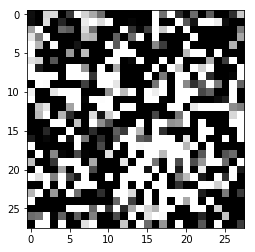

In [13]:
plt.imshow(testNoise_data[0].reshape(28,28))
plt.gray()

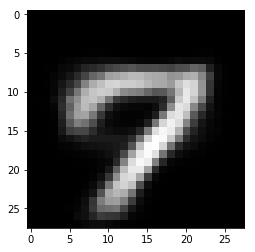

In [14]:
predictions=autoencoder.predict(testNoise_data[:2])
plt.imshow(predictions[0].reshape(28,28))
plt.gray()

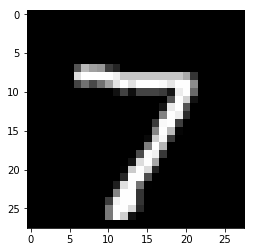

In [16]:
plt.imshow(x_test[0].reshape(28,28))
plt.gray()